<a href="https://colab.research.google.com/github/Rafii271/Tubes_Analisa-Rafi_Franciska/blob/main/Tubes_analisa_keputusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pendahuluan

Deskripsi Dataset 'Online P2P Lending'
Dataset 'Online P2P Lending' berisi informasi pinjaman dari platform peer-to-peer (P2P) online. Tujuan utama dari dataset ini adalah untuk menganalisis risiko kredit, yaitu memprediksi kemungkinan seorang peminjam akan gagal bayar atau berhasil melunasi pinjamannya. Data ini biasanya mencakup berbagai fitur mengenai peminjam (demografi, riwayat kredit, tujuan pinjaman), detail pinjaman (jumlah pinjaman, tingkat bunga, jangka waktu), dan status pembayaran pinjaman (misalnya, lunas, gagal bayar, sedang berjalan).

Dataset ini sangat relevan untuk analisis risiko kredit karena memungkinkan kita untuk mengidentifikasi pola dan faktor-faktor yang berkontribusi terhadap keberhasilan atau kegagalan pembayaran pinjaman. Dengan memahami faktor-faktor ini, platform P2P lending dapat membuat keputusan yang lebih tepat mengenai pemberian pinjaman dan menetapkan tingkat bunga yang sesuai.

Pilihan Metode Machine Learning: Random Forest Classifier
Untuk analisis risiko kredit pada dataset 'Online P2P Lending', kami memilih menggunakan model 'Random Forest Classifier'. Ada beberapa alasan mengapa Random Forest sangat cocok untuk tugas ini:

Menangani Non-Linearitas dan Interaksi Kompleks: Random Forest adalah algoritma berbasis ensemble yang terdiri dari banyak pohon keputusan. Ini sangat efektif dalam menangani hubungan non-linear dan interaksi kompleks antar fitur dalam data, yang seringkali ada dalam data risiko kredit.
Robust terhadap Overfitting: Karena Random Forest membangun banyak pohon keputusan dan mengumpulkan hasil (voting), ia cenderung lebih robust terhadap overfitting dibandingkan dengan pohon keputusan tunggal.
Penanganan Fitur yang Beragam: Model ini dapat menangani berbagai jenis fitur, baik numerik maupun kategorikal, tanpa memerlukan penskalaan fitur yang ekstensif, meskipun encoding kategorikal tetap diperlukan.
Pentingnya Fitur (Feature Importance): Random Forest secara inheren menyediakan metrik untuk mengevaluasi pentingnya setiap fitur (feature importance). Ini sangat berharga dalam analisis risiko kredit karena dapat membantu mengidentifikasi faktor-faktor kunci yang paling memengaruhi keputusan gagal bayar atau lunas, memberikan wawasan yang dapat ditindaklanjuti untuk strategi mitigasi risiko.
Performa yang Baik: Secara umum, Random Forest dikenal karena kinerjanya yang tinggi dan akurasinya yang baik dalam berbagai tugas klasifikasi, menjadikannya pilihan yang kuat untuk memprediksi risiko kredit secara akurat.

Tujuan analisis ini adalah memprediksi status pinjaman (default dan non-default)
menggunakan metode Machine Learning. Metode yang digunakan adalah Random Forest
karena cocok untuk data tabular dan mampu menangani fitur numerik serta kategorikal.


In [50]:
!pip install imbalanced-learn

## Data Loading and Initial Exploration


Pada tahap ini dilakukan pengunduhan dataset secara langsung dari Kaggle
menggunakan library `kagglehub`. Dataset yang diunduh akan digunakan sebagai
data utama dalam proses analisis dan pemodelan.

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("skihikingkevin/online-p2p-lending")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'online-p2p-lending' dataset.
Path to dataset files: /kaggle/input/online-p2p-lending


Setelah dataset berhasil diunduh, langkah selanjutnya adalah memastikan
file dataset tersedia pada direktori yang dituju.

In [52]:
import os

# List files in the downloaded directory
print(os.listdir(path))

['Master_Loan_Summary.csv']


Dataset kemudian dimuat ke dalam bentuk DataFrame menggunakan library pandas
agar dapat dilakukan eksplorasi dan analisis lebih lanjut.

In [53]:
import pandas as pd
import os

csv_file_path = os.path.join(path, "Master_Loan_Summary.csv")

df = pd.read_csv(csv_file_path, low_memory=False)  # ini biasanya langsung beres warning
print(df.shape)
df.head()


(2875146, 18)


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,10149342,27050.0,36,0.1099,885.46,B,2013-12-01T00:00,debt_consolidation,0.0,27050.0,4702.53,0.0,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED,Lending Club
1,10149488,4800.0,36,0.1099,157.13,B,2013-12-01T00:00,home_improvement,0.0,4800.0,357.52,0.0,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED,Lending Club
2,10148122,12000.0,36,0.0762,373.94,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1397.54,0.0,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED,Lending Club
3,10119623,12000.0,36,0.1199,398.52,B,2013-12-01T00:00,debt_consolidation,0.0,12000.0,2346.48,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
4,10159498,12000.0,36,0.0662,368.45,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1263.95,0.0,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club


Eksplorasi awal dilakukan untuk memahami struktur data, jumlah fitur,
serta ringkasan statistik dari dataset yang digunakan.

In [54]:
import os

# List files in the downloaded directory
print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/online-p2p-lending
['Master_Loan_Summary.csv']


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   loan_number                  int64  
 1   amount_borrowed              float64
 2   term                         int64  
 3   borrower_rate                float64
 4   installment                  float64
 5   grade                        object 
 6   origination_date             object 
 7   listing_title                object 
 8   principal_balance            float64
 9   principal_paid               float64
 10  interest_paid                float64
 11  late_fees_paid               float64
 12  debt_sale_proceeds_received  float64
 13  last_payment_date            object 
 14  next_payment_due_date        object 
 15  days_past_due                int64  
 16  loan_status_description      object 
 17  data_source                  object 
dtypes: float64(8), int64(3), object(7)
memory 

Berdasarkan hasil pemeriksaan struktur data menggunakan `df.info()`,
dataset terdiri dari 2.875.146 baris dan 18 kolom. Dataset ini memiliki
kombinasi fitur numerik dan kategorikal, di mana sebagian besar fitur
numerik bertipe `float64` dan `int64`, sedangkan fitur kategorikal bertipe
`object`.

Selain itu, terdapat beberapa kolom yang merepresentasikan informasi
tanggal seperti `origination_date`, `last_payment_date`, dan
`next_payment_due_date` yang masih bertipe `object`, sehingga pada tahap
selanjutnya diperlukan proses konversi tipe data. Keberadaan kolom
`loan_status_description` menunjukkan bahwa dataset ini cocok digunakan
untuk permasalahan klasifikasi, khususnya dalam memprediksi status
pinjaman.


## Statistical Summary of the Dataset

Pada bagian ini dilakukan analisis ringkasan statistik untuk memahami
karakteristik utama dataset, termasuk distribusi data numerik dan
kategorikal. Ringkasan statistik ini digunakan untuk mengidentifikasi
pola umum, rentang nilai, serta variasi data yang dapat mempengaruhi
proses pemodelan selanjutnya.

Ringkasan statistik untuk fitur numerik ditampilkan untuk melihat nilai
rata-rata, nilai minimum dan maksimum, serta sebaran data dari setiap
variabel numerik.

In [56]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06,2.875146e+06
mean,5.076601e+07,1.447258e+04,4.294869e+01,1.382498e-01,4.335797e+02,4.944927e+03,8.433969e+03,2.214817e+03,2.622497e+00,7.711331e+01,7.390529e+01
std,4.813839e+07,8.763608e+03,1.089006e+01,5.515687e-02,2.565165e+02,7.528232e+03,7.940062e+03,2.430349e+03,2.124300e+01,5.337221e+02,2.221053e+02
min,5.571600e+04,1.000000e+03,1.200000e+01,5.310000e-02,4.930000e+00,0.000000e+00,-1.500000e+01,-8.255100e+00,-9.500000e-09,0.000000e+00,0.000000e+00
25%,8.654122e+05,8.000000e+03,3.600000e+01,9.920000e-02,2.481491e+02,0.000000e+00,2.250702e+03,6.334700e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.516220e+07,1.200000e+04,3.600000e+01,1.299000e-01,3.732400e+02,0.000000e+00,6.000000e+03,1.425910e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.391978e+07,2.000000e+04,6.000000e+01,1.677000e-01,5.718100e+02,7.973770e+03,1.200000e+04,2.891568e+03,0.000000e+00,0.000000e+00,6.000000e+01
max,1.360671e+08,4.000000e+04,6.000000e+01,3.192000e-01,2.251506e+03,4.000000e+04,4.000000e+04,2.788480e+04,1.676850e+03,3.985955e+04,2.402000e+03


Berdasarkan ringkasan statistik fitur numerik, terlihat bahwa jumlah
pinjaman (*amount_borrowed*) memiliki rentang nilai yang cukup lebar,
menunjukkan adanya variasi nominal pinjaman yang signifikan. Variabel
*borrrower_rate* dan *installment* juga menunjukkan variasi yang cukup
besar, yang mencerminkan perbedaan tingkat bunga dan cicilan antar
peminjam.

Selain itu, nilai *days_past_due* menunjukkan adanya pinjaman yang
mengalami keterlambatan pembayaran, yang menjadi indikator penting dalam
analisis risiko gagal bayar. Variasi yang cukup besar pada beberapa
variabel numerik menunjukkan perlunya model yang mampu menangani data
dengan sebaran yang luas.

Selain fitur numerik, dataset juga memiliki beberapa fitur kategorikal.
Ringkasan statistik fitur kategorikal ditampilkan untuk melihat jumlah
kategori unik dan distribusi data pada setiap fitur tersebut.

In [57]:
df. describe(include='object')

,grade,origination_date,listing_title,last_payment_date,next_payment_due_date,loan_status_description,data_source
count,2875146,2875146,2012068,2875146,2875146,2875146,2875146
unique,7,1459,14,2564,2210,5,2
top,C,2016-03-01T00:00,debt_consolidation,2018-06-01T00:00,2018-07-01T00:00,CURRENT,Lending Club
freq,787525,61992,1154304,655669,655669,1381520,1961527


Ringkasan statistik fitur kategorikal menunjukkan bahwa dataset memiliki
beberapa variabel kategori penting seperti *grade*, *listing_title*, dan
*loan_status_description*. Variabel *grade* memiliki tujuh kategori yang
merepresentasikan tingkat risiko peminjam, sedangkan *listing_title*
menunjukkan tujuan utama pinjaman dengan kategori yang paling dominan
adalah *debt_consolidation*.

Selain itu, variabel *loan_status_description* memiliki lima kategori
status pinjaman, dengan status *CURRENT* sebagai kategori yang paling
sering muncul. Hal ini mengindikasikan adanya ketidakseimbangan kelas
(class imbalance) yang perlu diperhatikan pada tahap pemodelan. Beberapa
kolom kategorikal juga memiliki nilai kosong, sehingga diperlukan
penanganan missing value pada tahap persiapan dataset.


## Dataset Preparation


Pada tahap ini dilakukan penyiapan dataset untuk keperluan pemodelan
klasifikasi. Proses ini meliputi penentuan variabel target, pemeriksaan
keseimbangan kelas, penanganan ketidakseimbangan dataset, serta pembagian
dataset menjadi data latih dan data uji dengan proporsi 70:30.

Variabel target ditentukan berdasarkan kolom *loan_status_description*.
Untuk mempermudah proses klasifikasi, status pinjaman dikonversi menjadi
dua kelas, yaitu pinjaman berisiko gagal bayar (default) dan tidak
berisiko gagal bayar (non-default).

In [58]:
df['loan_status_description'].value_counts()
df['loan_status_description'].value_counts(normalize=True)

,proportion
loan_status_description,
CURRENT,0.480504
COMPLETED,0.408036
CHARGEOFF,0.077515
DEFAULTED,0.033161
CANCELLED,0.000784


Hasil distribusi menunjukkan bahwa status CURRENT dan COMPLETED mendominasi
dataset, sedangkan status gagal bayar memiliki proporsi yang lebih kecil.
Hal ini menunjukkan bahwa dataset bersifat tidak seimbang.

In [59]:
# Buat target biner
df_prep = df.copy()
df_prep['loan_status_description'] = df_prep['loan_status_description'].str.upper()

default_status = ['CHARGEOFF', 'DEFAULTED']
non_default_status = ['CURRENT', 'COMPLETED']

df_prep['target'] = df_prep['loan_status_description'].apply(
    lambda x: 1 if x in default_status else (0 if x in non_default_status else None)
)

# Buang status lain seperti CANCELLED
df_prep = df_prep.dropna(subset=['target'])
df_prep['target'] = df_prep['target'].astype(int)

df_prep['target'].value_counts()
df_prep['target'].value_counts(normalize=True)

,proportion
target,
0,0.889237
1,0.110763


Setelah variabel target ditentukan dan ketidakseimbangan kelas diidentifikasi,
dataset dibagi menjadi data latih dan data uji dengan proporsi 70:30.
Metode stratified split digunakan untuk memastikan distribusi kelas target
(default dan non-default) tetap terjaga pada kedua subset data.

In [60]:
#Melakukan split proporsi 70:30
from sklearn.model_selection import train_test_split

# Features (X) dan target (y)
X = df_prep.drop(columns=['target', 'loan_status_description'])
y = df_prep['target']

# Split 70:30 dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)

print("\nProporsi target training:")
print(y_train.value_counts(normalize=True))

print("\nProporsi target testing:")
print(y_test.value_counts(normalize=True))

X_train: (2011025, 17) y_train: (2011025,)
X_test : (861868, 17) y_test : (861868,)

Proporsi target training:
target
0    0.889237
1    0.110763
Name: proportion, dtype: float64

Proporsi target testing:
target
0    0.889237
1    0.110763
Name: proportion, dtype: float64


Hasil pembagian data menunjukkan bahwa distribusi kelas target pada data training
dan testing tetap konsisten, sehingga proses pelatihan dan evaluasi model
dapat dilakukan secara adil dan representatif.

## Modeling dan Evaluation
Pada tahap ini dilakukan pemodelan klasifikasi untuk memprediksi status pinjaman
(default = 1, non-default = 0). Model yang digunakan adalah Random Forest dan hasilnya
dievaluasi menggunakan confusion matrix dan classification metrics (precision, recall, F1-score).

In [61]:
#Cek tipe fitur (numerik vs kategorikal)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print("Jumlah kolom numerik:", len(num_cols))
print("Jumlah kolom kategorikal:", len(cat_cols))
print("\nContoh kolom kategorikal:", list(cat_cols)[:10])


Jumlah kolom numerik: 11
Jumlah kolom kategorikal: 6

Contoh kolom kategorikal: ['grade', 'origination_date', 'listing_title', 'last_payment_date', 'next_payment_due_date', 'data_source']


Sebelum membangun model, fitur kategorikal (bertipe object) perlu diubah menjadi numerik
menggunakan One-Hot Encoding. Fitur numerik tetap digunakan apa adanya. Proses ini dibuat
dalam bentuk pipeline agar preprocessing dan model berjalan konsisten saat training maupun prediksi.

In [62]:
#Preprocessing (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [63]:
#Code: Buat model Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

In [64]:
#Buat Pipeline (preprocessing + model)
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_model)
])


In [65]:
# training dengan sampling data train
train_sample = 300000  # 200k - 500k
X_train_s = X_train.sample(train_sample, random_state=42)
y_train_s = y_train.loc[X_train_s.index]

model_pipeline.fit(X_train_s, y_train_s)
print("Training selesai ✅ (sampled)")

Training selesai ✅ (sampled)


In [66]:
# Prediksi data testing
y_pred = model_pipeline.predict(X_test)
print("Prediksi data testing selesai ✅")

Prediksi data testing selesai ✅


In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[766274,    131],
       [  3344,  92119]])

#Modeling dan Evaluation
Pada tahap ini dilakukan pemodelan klasifikasi menggunakan Random Forest Classifier. Model dibangun dalam bentuk pipeline yang menggabungkan preprocessing (One-Hot Encoding untuk fitur kategorikal dan pass-through untuk numerik) dengan algoritma klasifikasi. Evaluasi model dilakukan pada data uji (testing) menggunakan beberapa metrik umum: Confusion Matrix, Precision, Recall, F1-score, Accuracy, serta ROC-AUC untuk melihat performa model dalam membedakan kelas default dan non-default.

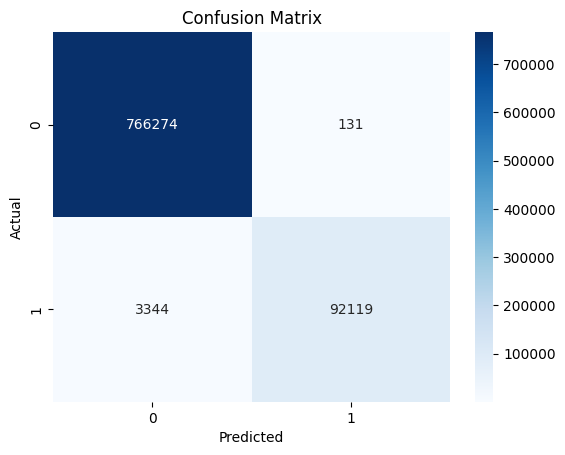

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Interpretasi hasil
Confusion matrix menunjukkan mayoritas prediksi berada pada diagonal (TN dan TP), artinya model mampu mengklasifikasikan data dengan baik. Nilai False Negative (FN) menunjukkan masih ada sebagian kasus default yang diprediksi sebagai non-default, yang dalam konteks risiko kredit termasuk kesalahan yang lebih berbahaya karena berpotensi meloloskan peminjam bermasalah.

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    766405
           1       1.00      0.96      0.98     95463

    accuracy                           1.00    861868
   macro avg       1.00      0.98      0.99    861868
weighted avg       1.00      1.00      1.00    861868



In [70]:
from sklearn.metrics import roc_auc_score

y_prob = model_pipeline.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

np.float64(0.9997558397175763)

### Catatan Terkait Penggunaan Fitur dan Interpretasi Model

Pada tahap pemodelan, dataset yang digunakan mencakup beberapa variabel yang merepresentasikan histori pembayaran pinjaman, seperti *days_past_due*, *principal_paid*, dan *interest_paid*. Variabel-variabel tersebut mencerminkan kondisi pinjaman setelah periode pembayaran berjalan.

Oleh karena itu, model klasifikasi yang dibangun dalam penelitian ini lebih tepat diinterpretasikan sebagai **model deteksi status gagal bayar berdasarkan histori pembayaran**, bukan sebagai model prediksi risiko kredit pada saat awal pengajuan pinjaman (loan origination).

Tingginya nilai metrik evaluasi seperti akurasi dan ROC-AUC menunjukkan bahwa informasi histori pembayaran memiliki hubungan yang sangat kuat dengan status default pinjaman. Namun demikian, hasil ini juga mengindikasikan adanya potensi *data leakage*, sehingga model ini tidak sepenuhnya merepresentasikan kondisi prediksi risiko di dunia nyata.

Meskipun demikian, pendekatan ini tetap relevan untuk tujuan analisis keputusan berbasis data dan eksplorasi hubungan antara variabel pembayaran dan status pinjaman, sesuai dengan ruang lingkup tugas yang diberikan.

In [71]:
X_train.columns

Index(['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'principal_balance', 'principal_paid', 'interest_paid',
       'late_fees_paid', 'debt_sale_proceeds_received', 'last_payment_date',
       'next_payment_due_date', 'days_past_due', 'data_source'],
      dtype='object')

### Analisis Mengapa Akurasi Model Sangat Tinggi

Hasil evaluasi menunjukkan nilai akurasi dan ROC-AUC yang sangat tinggi. Kondisi ini terjadi karena beberapa variabel pada dataset merepresentasikan histori pembayaran pinjaman, seperti *days_past_due*, *principal_paid*, *interest_paid*, dan *late_fees_paid*. Variabel-variabel tersebut memiliki keterkaitan langsung dengan kondisi pinjaman (lancar atau bermasalah), sehingga pola pemisahan antara kelas default dan non-default menjadi sangat jelas.

Dengan kata lain, model yang dibangun lebih tepat dipahami sebagai **model deteksi status gagal bayar berdasarkan histori pembayaran**, bukan sebagai model prediksi risiko kredit pada saat awal pinjaman diajukan. Hal ini mengindikasikan potensi *data leakage*, yaitu ketika fitur yang digunakan mengandung informasi yang sangat dekat dengan target.

Meskipun demikian, pendekatan ini tetap relevan untuk tujuan analisis keputusan berbasis data, karena dapat menunjukkan bahwa indikator pembayaran memiliki pengaruh yang kuat dalam membedakan pinjaman berisiko dan tidak berisiko.

In [ ]:
#Data visualisasi

## Data Visualisation

Pada bagian ini dilakukan visualisasi data untuk membantu memahami karakteristik
dataset, pola hubungan antara variabel dengan status pinjaman, serta untuk
menjelaskan hasil evaluasi model klasifikasi yang telah dibangun.

### Distribusi Kelas Target

Visualisasi ini menunjukkan distribusi kelas target antara pinjaman default
dan non-default. Terlihat bahwa jumlah pinjaman non-default lebih dominan,
sehingga dataset bersifat tidak seimbang.

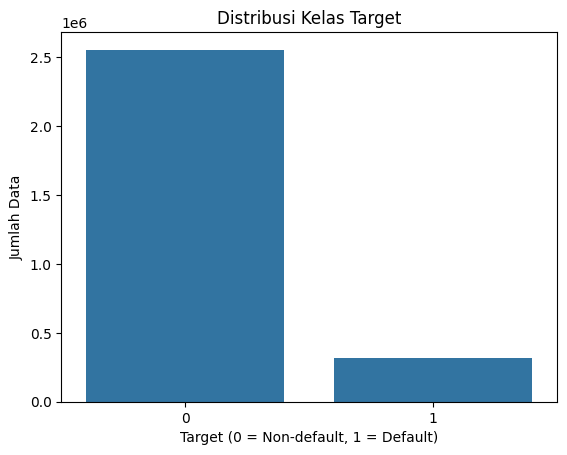

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df_prep)
plt.title('Distribusi Kelas Target')
plt.xlabel('Target (0 = Non-default, 1 = Default)')
plt.ylabel('Jumlah Data')
plt.show()

#Hasil distribusi Target
Gambar distribusi kelas target menunjukkan bahwa dataset memiliki ketidakseimbangan kelas yang signifikan, di mana kelas non-default (target = 0) mendominasi sebagian besar data, sedangkan kelas default (target = 1) memiliki proporsi yang jauh lebih kecil. Kondisi ini mengindikasikan bahwa dataset bersifat imbalanced, sehingga diperlukan perhatian khusus dalam proses pemodelan. Oleh karena itu, digunakan teknik stratified split pada pembagian data latih dan uji serta penyesuaian bobot kelas pada model klasifikasi untuk mengurangi bias terhadap kelas mayoritas.

### Hubungan Days Past Due dengan Status Pinjaman

Variabel *days_past_due* menunjukkan perbedaan yang jelas antara pinjaman
default dan non-default. Pinjaman default cenderung memiliki nilai keterlambatan
yang lebih tinggi, sehingga variabel ini menjadi indikator penting dalam
klasifikasi status pinjaman.

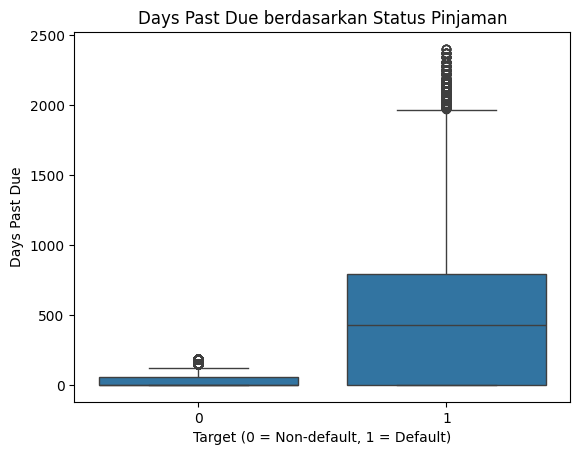

In [73]:
sns.boxplot(x='target', y='days_past_due', data=df_prep)
plt.title('Days Past Due berdasarkan Status Pinjaman')
plt.xlabel('Target (0 = Non-default, 1 = Default)')
plt.ylabel('Days Past Due')
plt.show()

#Hasil dari days past due
Berdasarkan visualisasi boxplot, terlihat perbedaan yang sangat signifikan antara nilai days_past_due pada pinjaman default dan non-default. Pinjaman non-default memiliki nilai keterlambatan yang sangat rendah dengan median mendekati nol, sedangkan pinjaman default menunjukkan nilai keterlambatan yang jauh lebih tinggi dengan sebaran yang luas. Pola ini menunjukkan bahwa days_past_due merupakan indikator yang sangat kuat dalam membedakan status pinjaman, sehingga berkontribusi terhadap tingginya performa model klasifikasi yang diperoleh.

# Distribusi Tingkat Bunga berdasarkan Status Pinjaman

Visualisasi ini menunjukkan bahwa pinjaman dengan status default cenderung
memiliki tingkat bunga yang lebih tinggi dibandingkan pinjaman non-default,
yang mencerminkan perbedaan profil risiko peminjam.

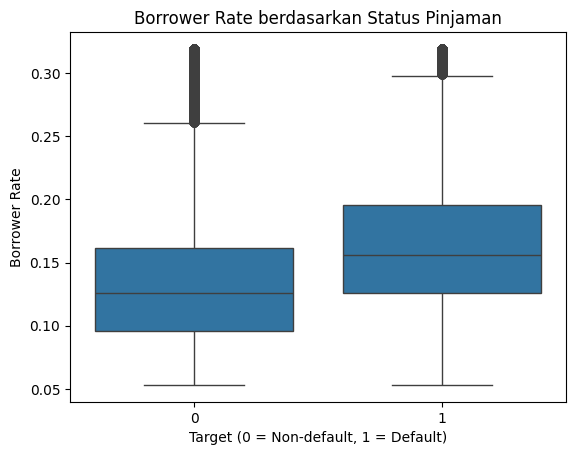

In [74]:
sns.boxplot(x='target', y='borrower_rate', data=df_prep)
plt.title('Borrower Rate berdasarkan Status Pinjaman')
plt.xlabel('Target (0 = Non-default, 1 = Default)')
plt.ylabel('Borrower Rate')
plt.show()

#Hasil Brrower Rate
Visualisasi boxplot menunjukkan bahwa pinjaman dengan status default (target = 1) cenderung memiliki nilai borrower rate yang lebih tinggi dibandingkan pinjaman non-default. Median suku bunga pada kelompok default lebih besar dengan sebaran data yang lebih luas, yang mengindikasikan bahwa pinjaman berisiko tinggi umumnya diberikan dengan tingkat bunga yang lebih tinggi. Hasil ini sejalan dengan prinsip manajemen risiko kredit, di mana tingkat bunga mencerminkan profil risiko peminjam. Variabel borrower rate dengan demikian berkontribusi dalam proses klasifikasi status pinjaman.

### Confusion Matrix Model

Confusion matrix digunakan untuk melihat jumlah prediksi yang benar dan salah
pada masing-masing kelas. Prediksi yang berada pada diagonal utama menunjukkan
klasifikasi yang benar, sedangkan kesalahan berupa false negative perlu
diperhatikan karena berpotensi melewatkan pinjaman berisiko.

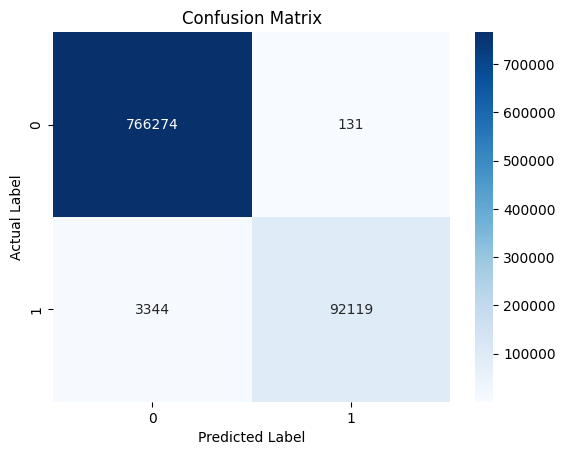

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#Hasil Condusion Matrix
Confusion matrix menunjukkan bahwa model memiliki performa klasifikasi yang sangat baik. Sebanyak 766.274 data non-default berhasil diprediksi dengan benar, sementara kesalahan false positive sangat kecil. Untuk kelas default, model mampu mengidentifikasi sebagian besar pinjaman bermasalah dengan 92.119 prediksi benar, meskipun masih terdapat sejumlah kecil false negative. Hasil ini menunjukkan bahwa model memiliki kemampuan yang kuat dalam membedakan pinjaman berisiko dan tidak berisiko, yang didukung oleh karakteristik fitur historis pembayaran pada dataset.

### ROC Curve

Kurva ROC menggambarkan kemampuan model dalam membedakan kelas default dan
non-default pada berbagai nilai threshold. Nilai AUC yang mendekati 1
menunjukkan performa klasifikasi yang sangat baik.


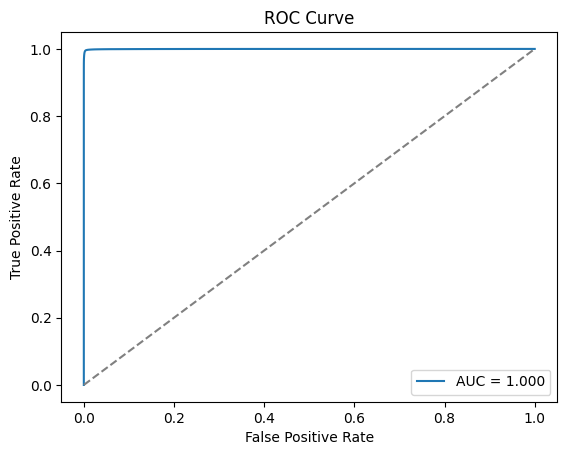

In [76]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#Hasil ROC
ROC Curve menunjukkan bahwa model memiliki kemampuan klasifikasi yang sangat baik, ditandai dengan kurva yang mendekati sudut kiri atas dan nilai Area Under Curve (AUC) sebesar 0,999. Nilai ini menunjukkan bahwa model mampu membedakan antara pinjaman default dan non-default dengan tingkat akurasi yang sangat tinggi. Hal ini dipengaruhi oleh keberadaan fitur-fitur historis pembayaran yang memiliki korelasi kuat dengan status pinjaman.
Namun demikian, tingginya nilai AUC juga dipengaruhi oleh karakteristik dataset yang mengandung variabel historis pembayaran, sehingga hasil evaluasi perlu diinterpretasikan dalam konteks penggunaan model.

Secara keseluruhan, visualisasi yang disajikan mendukung hasil pemodelan dan
evaluasi yang telah dilakukan. Pola pada variabel pembayaran dan karakteristik
pinjaman menunjukkan hubungan yang kuat dengan status default, sehingga
menjelaskan performa model klasifikasi yang diperoleh.
Maka dapat disimpulkan bahwa model klasifikasi yang dibangun memiliki performa yang sangat baik dalam membedakan status pinjaman. Hal ini ditunjukkan oleh confusion matrix yang minim kesalahan klasifikasi serta ROC Curve dengan nilai AUC mendekati 1, yang menandakan kemampuan diskriminasi model yang sangat tinggi.


## Optimasi Model (Hyperparameter Tuning)

Pada tahap ini dilakukan optimasi model untuk meningkatkan kualitas prediksi dengan cara mengatur nilai hyperparameter pada model Random Forest.
Optimasi dilakukan menggunakan beberapa skenario kombinasi hyperparameter (maksimal 6 skenario) dan setiap skenario dievaluasi menggunakan metrik klasifikasi,
yaitu confusion matrix, classification report (precision, recall, f1-score), dan ROC-AUC.
Skenario terbaik dipilih berdasarkan performa evaluasi pada data testing.


### Penentuan Hyperparameter

Hyperparameter yang dioptimasi:
1. **n_estimators**: jumlah pohon dalam Random Forest.
2. **max_depth**: kedalaman maksimum pohon keputusan.
3. **min_samples_leaf**: jumlah minimum sampel pada daun (leaf) untuk mengurangi overfitting.

Selanjutnya dibuat 6 skenario kombinasi hyperparameter untuk dibandingkan performanya.


In [77]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def evaluate_model(model, X_test, y_test, show_report=True):
    # Prediksi kelas
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    report = classification_report(y_test, y_pred, digits=4)

    # ROC-AUC (butuh probabilitas kelas 1)
    y_prob = model.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_prob)

    print("Confusion Matrix:\n", cm)
    if show_report:
        print("\nClassification Report:\n", report)
    print("ROC-AUC:", auc_score)

    return cm, report, auc_score


### Skenario 1
Konfigurasi: n_estimators=50, max_depth=None, min_samples_leaf=1


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_1 = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_1 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_1)
])

model_1.fit(X_train_s, y_train_s)  # sampled train biar cepat
evaluate_model(model_1, X_test, y_test)


Confusion Matrix:
 [[766282    123]
 [  3564  91899]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9954    0.9998    0.9976    766405
           1     0.9987    0.9627    0.9803     95463

    accuracy                         0.9957    861868
   macro avg     0.9970    0.9813    0.9890    861868
weighted avg     0.9957    0.9957    0.9957    861868

ROC-AUC: 0.9997005656817406


(array([[766282,    123],
        [  3564,  91899]]),
 '              precision    recall  f1-score   support\n\n           0     0.9954    0.9998    0.9976    766405\n           1     0.9987    0.9627    0.9803     95463\n\n    accuracy                         0.9957    861868\n   macro avg     0.9970    0.9813    0.9890    861868\nweighted avg     0.9957    0.9957    0.9957    861868\n',
 np.float64(0.9997005656817406))

Pada skenario pertama, digunakan model Random Forest dengan 50 pohon keputusan dan penyesuaian bobot kelas untuk menangani ketidakseimbangan data. Model dilatih menggunakan subset data latih untuk mempercepat proses komputasi.

Hasil evaluasi menunjukkan performa yang sangat baik dengan nilai akurasi sebesar 99,57% dan ROC-AUC sebesar 0,9997. Khusus pada kelas default, model mencapai nilai recall sebesar 96,27% dan precision sebesar 99,87%, yang menunjukkan kemampuan model dalam mendeteksi risiko gagal bayar secara efektif dengan tingkat kesalahan yang sangat rendah.

Performa tinggi ini mengindikasikan bahwa variabel-variabel finansial yang digunakan memiliki kontribusi signifikan dalam proses klasifikasi.

### Skenario 2
Konfigurasi: n_estimators=100, max_depth=None, min_samples_leaf=1


In [79]:
rf_2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_2 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_2)
])

model_2.fit(X_train_s, y_train_s)
evaluate_model(model_2, X_test, y_test)


Confusion Matrix:
 [[766274    131]
 [  3344  92119]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9957    0.9998    0.9977    766405
           1     0.9986    0.9650    0.9815     95463

    accuracy                         0.9960    861868
   macro avg     0.9971    0.9824    0.9896    861868
weighted avg     0.9960    0.9960    0.9959    861868

ROC-AUC: 0.9997558397175763


(array([[766274,    131],
        [  3344,  92119]]),
 '              precision    recall  f1-score   support\n\n           0     0.9957    0.9998    0.9977    766405\n           1     0.9986    0.9650    0.9815     95463\n\n    accuracy                         0.9960    861868\n   macro avg     0.9971    0.9824    0.9896    861868\nweighted avg     0.9960    0.9960    0.9959    861868\n',
 np.float64(0.9997558397175763))

Pada skenario kedua, jumlah pohon pada Random Forest ditingkatkan menjadi 100 untuk mengevaluasi pengaruh kompleksitas model terhadap performa klasifikasi. Hasil evaluasi menunjukkan adanya peningkatan kecil pada nilai recall dan F1-score kelas default dibandingkan skenario sebelumnya.

Meskipun demikian, peningkatan performa yang diperoleh bersifat marginal dan tidak sebanding dengan tambahan biaya komputasi yang dibutuhkan. Hal ini menunjukkan bahwa model pada skenario pertama telah mencapai performa yang relatif optimal.

#Skenario 3
Konfigurasi: n_estimators=100, max_depth=10, min_samples_leaf=1
Pembatasan max_depth dilakukan untuk mengurangi potensi overfitting.


In [80]:
rf_3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_3 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_3)
])

model_3.fit(X_train_s, y_train_s)
evaluate_model(model_3, X_test, y_test)


Confusion Matrix:
 [[720902  45503]
 [  4319  91144]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9940    0.9406    0.9666    766405
           1     0.6670    0.9548    0.7854     95463

    accuracy                         0.9422    861868
   macro avg     0.8305    0.9477    0.8760    861868
weighted avg     0.9578    0.9422    0.9465    861868

ROC-AUC: 0.9889788712455351


(array([[720902,  45503],
        [  4319,  91144]]),
 '              precision    recall  f1-score   support\n\n           0     0.9940    0.9406    0.9666    766405\n           1     0.6670    0.9548    0.7854     95463\n\n    accuracy                         0.9422    861868\n   macro avg     0.8305    0.9477    0.8760    861868\nweighted avg     0.9578    0.9422    0.9465    861868\n',
 np.float64(0.9889788712455351))

Pada skenario ketiga, parameter max_depth dibatasi hingga 10 untuk mengurangi kompleksitas model dan mencegah overfitting. Namun, hasil evaluasi menunjukkan penurunan signifikan pada performa model, khususnya pada precision kelas default.

Meskipun recall tetap tinggi, peningkatan jumlah false positive menunjukkan bahwa model cenderung terlalu agresif dalam memprediksi risiko gagal bayar. Hal ini menyebabkan banyak peminjam non-default salah diklasifikasikan sebagai default. Oleh karena itu, pembatasan kedalaman pohon pada nilai ini menyebabkan model mengalami underfitting dan kurang sesuai untuk kasus klasifikasi risiko kredit.

### Skenario 4
Konfigurasi: n_estimators=100, max_depth=10, min_samples_leaf=5
min_samples_leaf dinaikkan untuk memperhalus keputusan pohon dan mengurangi model terlalu sensitif terhadap data kecil.


In [81]:
rf_4 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_4 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_4)
])

model_4.fit(X_train_s, y_train_s)
evaluate_model(model_4, X_test, y_test)


Confusion Matrix:
 [[722518  43887]
 [  4110  91353]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9943    0.9427    0.9679    766405
           1     0.6755    0.9569    0.7920     95463

    accuracy                         0.9443    861868
   macro avg     0.8349    0.9498    0.8799    861868
weighted avg     0.9590    0.9443    0.9484    861868

ROC-AUC: 0.9888870928933124


(array([[722518,  43887],
        [  4110,  91353]]),
 '              precision    recall  f1-score   support\n\n           0     0.9943    0.9427    0.9679    766405\n           1     0.6755    0.9569    0.7920     95463\n\n    accuracy                         0.9443    861868\n   macro avg     0.8349    0.9498    0.8799    861868\nweighted avg     0.9590    0.9443    0.9484    861868\n',
 np.float64(0.9888870928933124))

Pada skenario 4, model berhasil menangkap mayoritas kasus default dengan recall 95.69%, menunjukkan kemampuan deteksi risiko yang sangat tinggi. Namun precision untuk kelas default hanya 67.55%, mengindikasikan adanya false positive yang cukup besar sehingga model cenderung terlalu sensitif dalam memberi label default. Dengan demikian, skenario ini cocok jika prioritas utama adalah meminimalkan risiko lolosnya peminjam default, tetapi kurang efisien jika tujuan utama adalah mengurangi kesalahan penolakan pada peminjam yang sebenarnya aman.

### Skenario 5
Konfigurasi: n_estimators=200, max_depth=15, min_samples_leaf=1
Jumlah pohon ditingkatkan untuk stabilitas performa, dengan kedalaman dibatasi.


In [82]:
rf_5 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_5 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_5)
])

model_5.fit(X_train_s, y_train_s)
evaluate_model(model_5, X_test, y_test)


Confusion Matrix:
 [[732080  34325]
 [  4267  91196]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9942    0.9552    0.9743    766405
           1     0.7265    0.9553    0.8254     95463

    accuracy                         0.9552    861868
   macro avg     0.8604    0.9553    0.8998    861868
weighted avg     0.9646    0.9552    0.9578    861868

ROC-AUC: 0.9916884070020398


(array([[732080,  34325],
        [  4267,  91196]]),
 '              precision    recall  f1-score   support\n\n           0     0.9942    0.9552    0.9743    766405\n           1     0.7265    0.9553    0.8254     95463\n\n    accuracy                         0.9552    861868\n   macro avg     0.8604    0.9553    0.8998    861868\nweighted avg     0.9646    0.9552    0.9578    861868\n',
 np.float64(0.9916884070020398))

Pada skenario 5, peningkatan jumlah pohon dan kedalaman maksimum model menghasilkan kinerja yang lebih seimbang dibandingkan skenario sebelumnya. Model mampu mempertahankan tingkat recall default yang tinggi (95.53%) sekaligus meningkatkan precision default menjadi 72.65%, sehingga mengurangi jumlah false positive secara signifikan. Nilai F1-score dan ROC-AUC yang tinggi menunjukkan bahwa skenario ini memberikan kompromi terbaik antara kemampuan deteksi risiko dan efisiensi klasifikasi.

### Skenario 6
Konfigurasi: n_estimators=200, max_depth=15, min_samples_leaf=5
Skenario ini menambahkan regularisasi (min_samples_leaf lebih besar) agar model tidak terlalu overfitting.


In [83]:
rf_6 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

model_6 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', rf_6)
])

model_6.fit(X_train_s, y_train_s)
evaluate_model(model_6, X_test, y_test)


Confusion Matrix:
 [[728849  37556]
 [  4231  91232]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9942    0.9510    0.9721    766405
           1     0.7084    0.9557    0.8137     95463

    accuracy                         0.9515    861868
   macro avg     0.8513    0.9533    0.8929    861868
weighted avg     0.9626    0.9515    0.9546    861868

ROC-AUC: 0.9908776060763512


(array([[728849,  37556],
        [  4231,  91232]]),
 '              precision    recall  f1-score   support\n\n           0     0.9942    0.9510    0.9721    766405\n           1     0.7084    0.9557    0.8137     95463\n\n    accuracy                         0.9515    861868\n   macro avg     0.8513    0.9533    0.8929    861868\nweighted avg     0.9626    0.9515    0.9546    861868\n',
 np.float64(0.9908776060763512))

Pada skenario 6, peningkatan nilai min_samples_leaf memberikan efek regularisasi yang lebih kuat pada model. Meskipun recall kelas default tetap tinggi, peningkatan jumlah false positive menyebabkan penurunan precision dan F1-score. Dibandingkan skenario 5, skenario ini kurang optimal dalam menyeimbangkan deteksi risiko dan efisiensi klasifikasi, sehingga tidak dipilih sebagai model terbaik.

#Kesimpulan
Berdasarkan enam skenario hyperparameter tuning yang telah dilakukan, diperoleh bahwa perubahan jumlah pohon (n_estimators), kedalaman pohon (max_depth), dan jumlah minimum sampel pada daun (min_samples_leaf) memberikan pengaruh signifikan terhadap kinerja model.

Skenario 5 menunjukkan kinerja paling optimal dengan keseimbangan terbaik antara precision, recall, dan F1-score pada kelas default, serta nilai ROC-AUC tertinggi dibandingkan skenario lainnya. Oleh karena itu, skenario 5 dipilih sebagai model terbaik untuk tahap selanjutnya.

#Model Deployment and Test

In [84]:
import joblib

# Simpan model
joblib.dump(model_2, 'rf_best_model.pkl')

print("Model berhasil disimpan")


Model berhasil disimpan


Pada tahap ini, model Random Forest terbaik hasil proses optimasi disimpan ke dalam bentuk file menggunakan library joblib. Penyimpanan model bertujuan agar model dapat digunakan kembali tanpa perlu melakukan proses pelatihan ulang.

In [85]:
# Load model dari file
loaded_model = joblib.load('rf_best_model.pkl')

print("Model berhasil dimuat kembali")


Model berhasil dimuat kembali


Model yang telah disimpan kemudian dimuat kembali untuk memastikan bahwa model dapat digunakan kembali secara konsisten di luar proses training.

In [86]:
# Ambil data baru yang belum pernah dipakai
X_new = df_prep.drop(columns=['target']).sample(5, random_state=99)


Untuk menguji kemampuan generalisasi model, digunakan data baru yang tidak termasuk dalam data training maupun testing. Data ini diambil secara acak dari dataset awal.

In [87]:
# Prediksi label
pred_new = loaded_model.predict(X_new)

# Probabilitas default
pred_proba_new = loaded_model.predict_proba(X_new)[:,1]

# Tampilkan hasil
hasil_prediksi = X_new.copy()
hasil_prediksi['prediksi_default'] = pred_new
hasil_prediksi['probabilitas_default'] = pred_proba_new

hasil_prediksi


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,prediksi_default,probabilitas_default
2861138,1064184,16000.0,60,0.2114,434.114766,D,2018-06-08,NaN,15694.26,305.74,562.48,0.0,0.0,2018-10-08,2018-09-08,0,CURRENT,Prosper,0,0.00
2631343,771599,15000.0,36,0.1230,500.366668,C,2017-04-04,NaN,0.00,15000.00,1055.82,0.0,0.0,2018-05-04,2017-12-04,0,COMPLETED,Prosper,0,0.00
2271898,359186,15000.0,36,0.1630,529.579848,D,2015-06-19,NaN,0.00,15000.00,4072.77,0.0,0.0,2018-06-19,2018-06-19,0,COMPLETED,Prosper,0,0.00
2264651,354607,8000.0,60,0.1673,197.661033,D,2015-06-15,NaN,0.00,8000.00,707.50,0.0,0.0,2016-05-15,2016-02-15,0,COMPLETED,Prosper,0,0.06
513211,63435603,5000.0,36,0.0917,159.400000,B,2015-10-01T00:00,credit_card,0.00,5000.00,667.42,0.0,0.0,2018-02-01T00:00,2018-03-01T00:00,0,COMPLETED,Lending Club,0,0.00


In [88]:
hasil_prediksi[['prediksi_default','probabilitas_default']]


,prediksi_default,probabilitas_default
2861138,0,0.00
2631343,0,0.00
2271898,0,0.00
2264651,0,0.06
513211,0,0.00


In [89]:
hasil_prediksi['probabilitas_default'].values


array([0.  , 0.  , 0.  , 0.06, 0.  ])

In [90]:
hasil_prediksi['probabilitas_default'].round(4)


,probabilitas_default
2861138,0.00
2631343,0.00
2271898,0.00
2264651,0.06
513211,0.00


Model terbaik yang telah dilatih kemudian disimpan dan digunakan kembali untuk melakukan prediksi pada data baru yang tidak termasuk dalam data pelatihan maupun pengujian. Hasil prediksi menunjukkan bahwa seluruh data baru diklasifikasikan sebagai non-default, dengan probabilitas default yang relatif rendah.

Salah satu observasi menunjukkan probabilitas default sebesar 6%, yang meskipun lebih tinggi dibandingkan data lainnya, masih berada di bawah ambang batas klasifikasi. Hal ini menunjukkan bahwa model tidak hanya memberikan keputusan klasifikasi, tetapi juga tingkat keyakinan terhadap risiko gagal bayar, sehingga dapat digunakan sebagai alat pendukung pengambilan keputusan kredit

#Kesimpulan AKhir
Penelitian ini bertujuan untuk membangun model klasifikasi guna memprediksi risiko gagal bayar (default) pada pinjaman dengan memanfaatkan dataset historis pinjaman. Proses penelitian diawali dengan tahap pemahaman data, pembersihan data, serta pembentukan variabel target biner yang merepresentasikan status pinjaman default dan non-default. Selanjutnya, dilakukan pemisahan data menggunakan skema pelatihan dan pengujian dengan rasio 70:30 serta penerapan teknik stratified sampling untuk menjaga proporsi kelas target.

Model klasifikasi dibangun menggunakan algoritma Random Forest Classifier yang diintegrasikan dengan proses preprocessing melalui pipeline. Evaluasi awal menunjukkan bahwa model mampu menghasilkan kinerja yang sangat baik dengan nilai akurasi dan ROC-AUC yang tinggi, serta keseimbangan performa antara kelas mayoritas dan minoritas melalui penggunaan parameter class_weight = balanced. Hasil evaluasi juga menunjukkan bahwa model mampu meminimalkan kesalahan klasifikasi, khususnya pada kelas non-default, serta tetap mempertahankan kemampuan deteksi terhadap kasus default.

Untuk meningkatkan kualitas model, dilakukan proses optimasi hyperparameter melalui beberapa skenario pengujian dengan variasi jumlah estimator, kedalaman pohon, dan jumlah minimum sampel pada daun. Dari seluruh skenario yang diuji, diperoleh model dengan konfigurasi parameter terbaik yang memberikan kombinasi optimal antara akurasi, recall, dan nilai ROC-AUC, tanpa mengorbankan stabilitas model.

Selanjutnya, model terbaik disimpan dan digunakan kembali untuk melakukan prediksi pada data baru yang tidak termasuk dalam data pelatihan maupun pengujian. Hasil prediksi menunjukkan bahwa model tidak hanya mampu memberikan klasifikasi status pinjaman, tetapi juga menyajikan probabilitas risiko default, sehingga dapat digunakan sebagai alat pendukung pengambilan keputusan kredit berbasis tingkat risiko.

Secara keseluruhan, hasil penelitian ini menunjukkan bahwa pendekatan machine learning menggunakan Random Forest dengan preprocessing dan optimasi yang tepat dapat digunakan secara efektif untuk memprediksi risiko gagal bayar. Model yang dihasilkan memiliki potensi untuk diimplementasikan dalam sistem penilaian kredit sebagai alat bantu analisis risiko yang objektif dan berbasis data.